In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
%cd /content/drive/My Drive/Titanic/

/content/drive/My Drive/Titanic


In [6]:
import pandas as pd
titanic_data = pd.read_csv('train_and_test2.csv')

In [5]:
titanic_data.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0


In [7]:
titanic_df=titanic_data.drop(['zero','zero.1','zero.2','zero.3','zero.4','zero.5','zero.6','zero.7','zero.8','zero.9','zero.10','zero.11','zero.12','zero.13','zero.14','zero.15',
                              'zero.16','zero.17','zero.18'], axis=1)

In [16]:
titanic_df.dropna(inplace=True)

In [21]:
embarked=pd.get_dummies(titanic_df['Embarked'],drop_first=True)
pclass=pd.get_dummies(titanic_df['Embarked'],drop_first=True)

In [32]:
titanic_df.columns

Index(['Passengerid',         'Age',        'Fare',         'Sex',
             'sibsp',       'Parch',      'Pclass',    'Embarked',
          '2urvived',           1.0,           2.0,           1.0,
                 2.0],
      dtype='object')

In [43]:
import seaborn as sb

In [8]:
titanic_df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


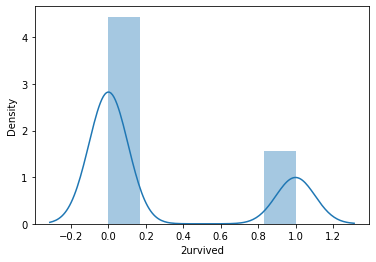

In [47]:
sb.distplot(titanic_df['2urvived'])

In [17]:
x=titanic_df.drop('2urvived', axis=1)
y=titanic_df['2urvived']

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [50]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
predictions=model.predict(X_test)

In [52]:
from sklearn.metrics import classification_report
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.87      0.94      0.90       286\n           1       0.79      0.63      0.70       107\n\n    accuracy                           0.85       393\n   macro avg       0.83      0.78      0.80       393\nweighted avg       0.85      0.85      0.85       393\n'

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8524173027989822

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[268,  18],
       [ 40,  67]])

In [55]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True)

In [1]:
from sklearn.feature_selection import chi2

In [18]:
chi_scores=chi2(x,y)

In [19]:
chi_scores

(array([3.12089424e+04, 2.66804676e+01, 3.11344603e+03, 1.36222266e+02,
        4.92804276e-01, 8.01919222e+00, 2.32622922e+01, 5.04591281e+00]),
 array([0.00000000e+00, 2.40035762e-07, 0.00000000e+00, 1.78400138e-31,
        4.82679041e-01, 4.62842096e-03, 1.41344167e-06, 2.46840987e-02]))

In [21]:
p_values = pd.Series(chi_scores[1],index = x.columns)
p_values.sort_values(ascending = False , inplace = True)

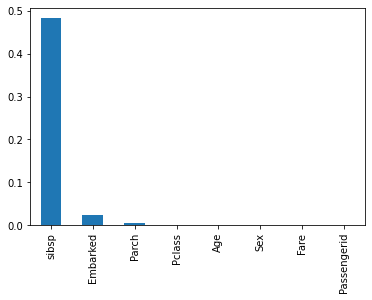

In [22]:
p_values.plot.bar()

In [23]:
x=x.drop(['Embarked','sibsp'], axis=1)

In [24]:
x

,Passengerid,Age,Fare,Sex,Parch,Pclass
0,1,22.0,7.2500,0,0,3
1,2,38.0,71.2833,1,0,1
2,3,26.0,7.9250,1,0,3
3,4,35.0,53.1000,1,0,1
4,5,35.0,8.0500,0,0,3
...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,3
1305,1306,39.0,108.9000,1,0,1
1306,1307,38.5,7.2500,0,0,3
1307,1308,28.0,8.0500,0,0,3


In [25]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3)

In [27]:
dt.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
predictions1=dt.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions1
               )

0.926208651399491

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=40, max_features='sqrt',min_samples_split=5, n_estimators=18)
rf_model.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=18,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
predictions2=rf_model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions2
               )

0.9796437659033079

In [37]:
from sklearn.svm import SVC
svm_model=SVC(kernel='linear')
svm_model.fit(x,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
predictions3=svm_model.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions3
               )

0.8447837150127226